# Football Match Statistics Analysis



In [17]:
import os
print("Current directory:", os.getcwd())
print("Files in current directory:", os.listdir('.'))

Current directory: C:\Users\IBS\Downloads\Football_Match_Analysis_Portfolio_Pack\notebooks
Files in current directory: ['.ipynb_checkpoints', 'Football_Analysis.ipynb']


In [18]:
DATA_PATH = "../data/soccer_matches_sample.csv"

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

path = Path(DATA_PATH)
df = pd.read_csv(path)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df.head()

,Date,League,Home_Team,Away_Team,Home_Goals,Away_Goals,Possession_Home,Possession_Away,Shots_Home,Shots_Away,ShotsOnTarget_Home,ShotsOnTarget_Away,Fouls_Home,Fouls_Away,Yellows_Home,Yellows_Away,Reds_Home,Reds_Away,Result,Year
0,2021-01-01,Premier League,Arsenal,Newcastle,1,1,42.699759,57.300241,7,5,1,2,10,14,1,2,0,0,D,2021
1,2021-01-02,Ligue 1,Lille,Rennes,2,1,51.883536,48.116464,8,6,2,2,8,3,2,0,0,0,H,2021
2,2021-01-02,Serie A,Roma,Inter,0,2,53.100706,46.899294,10,5,2,2,12,15,2,2,0,0,A,2021
3,2021-01-02,Serie A,Lazio,Atalanta,2,0,35.148180,64.851820,2,13,1,1,12,15,1,0,0,0,H,2021
4,2021-01-04,Ligue 1,Rennes,Marseille,2,0,40.650290,59.349710,6,8,3,3,7,18,1,2,1,0,H,2021


In [25]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2000 non-null   datetime64[ns]
 1   League              2000 non-null   object        
 2   Home_Team           2000 non-null   object        
 3   Away_Team           2000 non-null   object        
 4   Home_Goals          2000 non-null   int64         
 5   Away_Goals          2000 non-null   int64         
 6   Possession_Home     2000 non-null   float64       
 7   Possession_Away     2000 non-null   float64       
 8   Shots_Home          2000 non-null   int64         
 9   Shots_Away          2000 non-null   int64         
 10  ShotsOnTarget_Home  2000 non-null   int64         
 11  ShotsOnTarget_Away  2000 non-null   int64         
 12  Fouls_Home          2000 non-null   int64         
 13  Fouls_Away          2000 non-null   int64       

## KPIs

In [20]:
matches = len(df)
avg_total_goals = (df['Home_Goals'] + df['Away_Goals']).mean()
home_ppg = (
    (df['Result'].eq('H')*3 + df['Result'].eq('D')*1).mean()
)
print('Matches:', matches)
print('Avg Total Goals:', round(avg_total_goals,2))
print('Home Points Per Game:', round(home_ppg,3))

Matches: 2000
Avg Total Goals: 2.47
Home Points Per Game: 1.714


## Outcome distribution

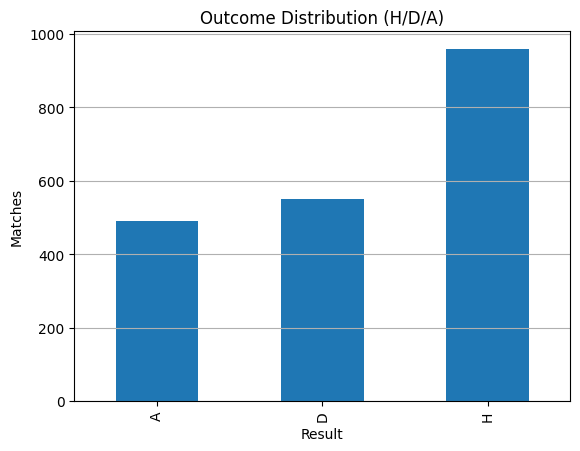

In [21]:
outcome_counts = df['Result'].value_counts().sort_index()
plt.figure()
outcome_counts.plot(kind='bar')
plt.title('Outcome Distribution (H/D/A)')
plt.xlabel('Result')
plt.ylabel('Matches')
plt.grid(True, axis='y')
plt.show()

## Avg total goals by league

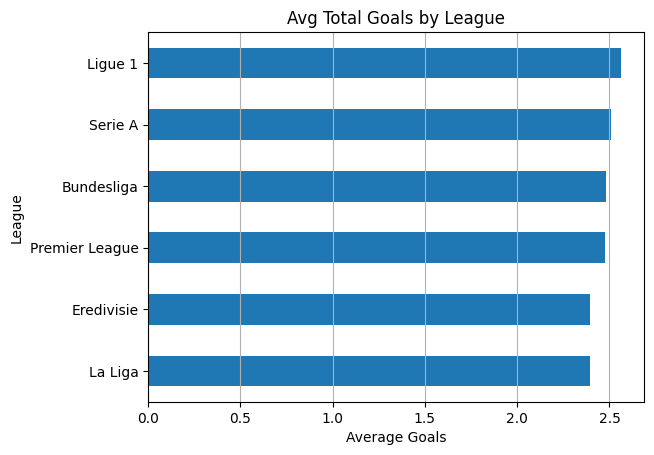

In [22]:
avg_goals_by_league = (df.assign(Total_Goals=df['Home_Goals']+df['Away_Goals'])
                        .groupby('League')['Total_Goals'].mean().sort_values(ascending=True))
plt.figure()
avg_goals_by_league.plot(kind='barh')
plt.title('Avg Total Goals by League')
plt.xlabel('Average Goals')
plt.ylabel('League')
plt.grid(True, axis='x')
plt.show()

## Shots on target vs goals (home)

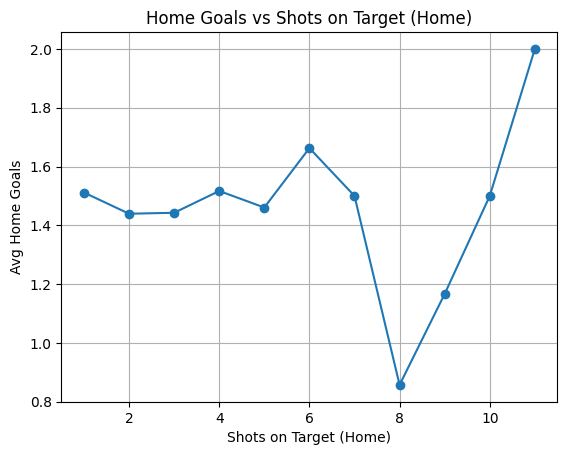

In [23]:
by_sot = df.groupby('ShotsOnTarget_Home')['Home_Goals'].mean()
plt.figure()
by_sot.plot(kind='line', marker='o')
plt.title('Home Goals vs Shots on Target (Home)')
plt.xlabel('Shots on Target (Home)')
plt.ylabel('Avg Home Goals')
plt.grid(True)
plt.show()

## Possession buckets vs Home win %

C:\Users\IBS\AppData\Local\Temp\ipykernel_1272\615409787.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hw_rate = df.groupby('Poss_Bucket')['Result'].apply(lambda s: (s=='H').mean())


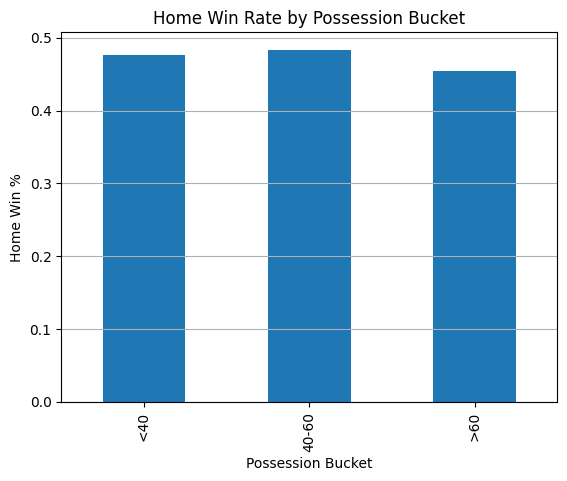

In [24]:
bins = [-1, 40, 60, 101]
labels = ['<40','40-60','>60']
df['Poss_Bucket'] = pd.cut(df['Possession_Home'], bins=bins, labels=labels)
hw_rate = df.groupby('Poss_Bucket')['Result'].apply(lambda s: (s=='H').mean())
plt.figure()
hw_rate.plot(kind='bar')
plt.title('Home Win Rate by Possession Bucket')
plt.xlabel('Possession Bucket')
plt.ylabel('Home Win %')
plt.grid(True, axis='y')
plt.show()